## BlackFriday Dataset Analysis

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
import sqlite3 as sql
import re
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
from IPython.display import Image

<img src="workflow.jpg?2" width="750" height="650" align="center"/>

In the above diagram, I outline the data science process in general. Ideally, we start with **Step 0** which is identifying and framing a business decision problem. From here I'll define the rest of the steps 

 **1. Data is Collected** - Here we identify the data elements that should be collected to solve the business problem. Here we also consider the amount of time to collect the data, how much data is needed to make your experiment impactful, costs, benefits vs. cons. We should identify all the needed data before moving on and have a good understanding of the different data sources involved. 
 
 **2. Data is Processed** - Here we prepare the data and get into a format that can be used for further analysis. This step normally takes the longest as the data source(s) maybe in different formats. For example, you may have data from a legacy system stored in 20 different tables while you have data coming from a non-relational database.
 
 **3. Clean the Data Set** - This is where we start to identify missing values, duplicates, outliers, and other things that would affect the data quality. Just note that we should simply not delete the data without doing further research as that data may contain some value information. 
 
 **4. EDA** - This is also called exploratory data analysis. Here we create different plots and summarizations to identify patterns within the data. Just note if there are further issues identified within the data then we go back to **step 2**.

 **5. Model Building** - This step we fit appropriate models based on business problem and it is experimental meaning that there is no right way to go about this. While there are clear things you should not do such as introducing selection bias into your sample, no single model is correct. Just remember that all models are bad but there some better than others. 
 
 **6. Communicate, Visualize, Report Building** - Here we formulate our analysis from the prior steps into something that is presentable and is clear. It should be straight to the point while taking the audience into heavy consideration. Your analysis will be used to help drive a business decision.
 
I will be using this as a template for the rest of my analysis below.


### Business Problem

We will be using **Black Friday** dataset from Kaggle and the link is  <a href="https://www.kaggle.com/mehdidag/black-friday"> here</a> . Basically we are going to predict how much a customer will purchase based on prior purchase history. We will also use clustering and other methods to see if we can gain more insight about different customer groups. 

### 1.Data Collection

Since this dataset was already collected for us, we will list the data elements and descriptions below. 


|Name|Type|Description|
|---|---|---|
|User_ID |Id| User | 
|Product_ID | Id |  Product |
|Gender| Boolean| N/A   |
|Age| Age| Age of Customer |
|Occupation| Id |Occupation of each customer|
|City_Category | Category | N/A
|Stay_In_Current_City_Years | Integer | N/A
|Marital_Status|Category | N/A
|Product_Category_1| Category | N/A
|Product_Category_2| Category | N/A
|Product_Category_3| Category | N/A
|Purchase| Float| Purchase amount in dollar ( Target)

**Note 1** - Purchase is the dependent variable. 

 ### 2.Data is Processed 

Here the data is already in a format we want to analyze.

### 3. Clean the dataset

Here we check for missing values, outliers, etc.  The first thing we'll do is read in the data and print out the first few rows of the data. 

`data.head(n=5): ` This prints out the first 5 rows of the data

In [2]:
data=pd.read_csv("BlackFriday.csv",header=0)
data.head(n=5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


We already see in the first few rows that there are missing values. Let's see how much there is by looping each column and printing out the results by column.

**`sum(data[i].isnull())`** - This will add up the trues which is essentially represented as a 1 in programming. <br> 
**`data.shape`** - Returns a tuple of dimensions for the dataframe

In [3]:
for i in data.columns:
    print("In Column {0} there are {1:.1f}% missing values".format(i, sum(data[i].isnull())/data.shape[0]*100)) 

In Column User_ID there are 0.0% missing values
In Column Product_ID there are 0.0% missing values
In Column Gender there are 0.0% missing values
In Column Age there are 0.0% missing values
In Column Occupation there are 0.0% missing values
In Column City_Category there are 0.0% missing values
In Column Stay_In_Current_City_Years there are 0.0% missing values
In Column Marital_Status there are 0.0% missing values
In Column Product_Category_1 there are 0.0% missing values
In Column Product_Category_2 there are 31.1% missing values
In Column Product_Category_3 there are 69.4% missing values
In Column Purchase there are 0.0% missing values


In the print out above, we have some missing values especially with `Product_Category_2` and `Product_Category_3`. We will try to replace the missing values with a 0 since they are categorical. Also we will ensure that the column datatypes are accurate, as pandas does its best to guess the datatype and sometimes chooses the incorrect one. 

**`data.fillna(0,inplace=True)`** - Here replace all missing values with 0 and use inplace=True to return a copy of the same object. <br>
**`data.dtypes`** - This returns an series of the datatypes by column.

In [4]:
data.fillna(0,inplace=True)
data.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [5]:
data.dtypes
data["Product_Category_2"]=data["Product_Category_2"].astype("int64",copy=True)
data["Product_Category_3"]=data["Product_Category_3"].astype("int64",copy=True)
data["Gender"]=data["Gender"].map({"M":0,"F":1})
data.dtypes

User_ID                        int64
Product_ID                    object
Gender                         int64
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2             int64
Product_Category_3             int64
Purchase                       int64
dtype: object

In terms of duplicates we'll have to assume that each transaction even though the same transaction is entirely possible. And outliers we can see how many observations fall outside $(Q_1-1.5*IQR, Q_3+1.5*IQR )$ where $Q_1$ is the 1st quartile and $Q_3$ is the 3rd quartile. This only works for numerical datatypes only. 

In [6]:
def outlier(x,lower_bd, upper_bd):
    if x>=lower_bd and x<=upper_bd:
        return 0 
    else:
        return 1
IQR=data["Purchase"].quantile(q=.75)-data["Purchase"].quantile(q=.25)
lower_bd=data["Purchase"].quantile(q=.25)-1.5*IQR
upper_bd=data["Purchase"].quantile(q=.75)+1.5*IQR
selection=data["Purchase"].apply(lambda x: outlier(x,lower_bd,upper_bd))
print("There are {0} potential outliers in column {1}".format(selection,"Purchase"))
data["Purchase"][selection==1].sort_values(ascending=True)[0:6]

There are 0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
537547    0
537548    0
537549    0
537550    0
537551    0
537552    0
537553    0
537554    0
537555    0
537556    0
537557    0
537558    0
537559    0
537560    0
537561    0
537562    0
537563    0
537564    0
537565    0
537566    0
537567    0
537568    0
537569    0
537570    0
537571    0
537572    0
537573    0
537574    0
537575    0
537576    0
Name: Purchase, Length: 537577, dtype: int64 potential outliers in column Purchase


473250    21384
114794    21384
133756    21385
509539    21386
503699    21386
241285    21386
Name: Purchase, dtype: int64

 ### 4. EDA

Now that the missing values are replaced, we'll start to explore the data. Pandas has a great function called `describe()` which will return the summary by column. 

Some observations here: 
1. The average purchase price is 9334 while the largest purchase is 23961. 
2. Roughly half the users are married.

In [7]:
data.describe()

,User_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.000000,537577.00000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,0.245913,8.08271,0.408797,5.295546,6.784907,3.871773,9333.859853
std,1.714393e+03,0.430627,6.52412,0.491612,3.750701,6.211618,6.265963,4981.022133
min,1.000001e+06,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,185.000000
25%,1.001495e+06,0.000000,2.00000,0.000000,1.000000,0.000000,0.000000,5866.000000
50%,1.003031e+06,0.000000,7.00000,0.000000,5.000000,5.000000,0.000000,8062.000000
75%,1.004417e+06,0.000000,14.00000,1.000000,8.000000,14.000000,8.000000,12073.000000
max,1.006040e+06,1.000000,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In the plot below, we first eliminate the duplicate users as some users are repeat buyers. From the bar plot below we see that that the male shoppers outnumber the female shoppers by more then twice. 

**Notes:** <br>
**`data[["User_ID","Gender"]].drop_duplicates()["Gender"]`** - We select the columns User_ID and Gender and drop the duplicates followed by selecting Gender which is last in the chain. <br> 

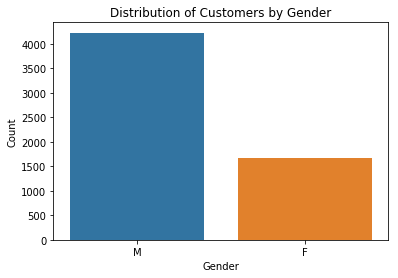

In [8]:
sns.countplot(data[["User_ID","Gender"]].drop_duplicates()["Gender"], order=[0,1])
plt.xticks([0,1],['M','F'])
plt.title("Distribution of Customers by Gender")
plt.ylabel("Count")
plt.show()

Below we see what the distribution of married couples are. The plot shows that more buyers are single then not. 

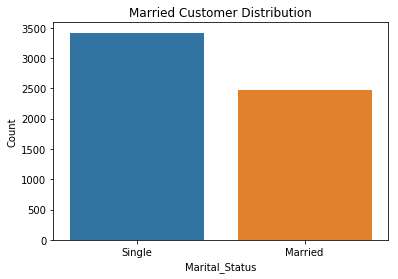

In [9]:
sns.countplot(data[["User_ID","Marital_Status"]].drop_duplicates()["Marital_Status"], order=[0,1])
plt.xticks([0,1],['Single','Married'])
plt.title("Married Customer Distribution")
plt.ylabel("Count")
plt.show()

Below we provide a summary of the total spent by males and females, and males spent roughly 3 times more the the females. 

In [10]:
smry_1=data[["Gender","Purchase"]].groupby("Gender").sum()
smry_1["Purchase"]=smry_1["Purchase"].apply(lambda x: "{:,}".format(x))
smry_1

,Purchase
Gender,
0,"3,853,044,357"
1,"1,164,624,021"


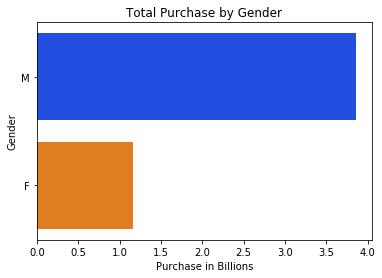

In [11]:
smry_1=data[["Gender","Purchase"]].groupby("Gender").sum()
sns.barplot(y=smry_1.index,x=smry_1["Purchase"]/1e9,orient="h",palette="bright")
plt.yticks([0,1],["M","F"])
plt.xlabel("Purchase in Billions")
plt.title("Total Purchase by Gender")
plt.show()

Next plot we will take a look at is a barchart of the amount of purchases by city

In [12]:
smry_2=data[["City_Category","Purchase"]].groupby("City_Category").sum()
smry_2

,Purchase
City_Category,
A,1295668797
B,2083431612
C,1638567969
